# Sistem Rekomendasi Game (Content-based Filtering) berdasarkan genre, platform, dan skor review

## **Project Overview**
Proyek ini bertujuan membangun sistem rekomendasi game berbasis Content-Based Filtering (CbF) dengan mempertimbangkan genre, platform, dan skor review sebagai fitur utama. Sistem ini akan memberikan saran game yang mirip dengan game tertentu yang disukai pengguna, berdasarkan karakteristik kontennya.

## **Data Understanding**
Project ini berdasarkan dan diambil dari dataset **Kaggle** dengan nama Metacritic Games 1995-2024 yang dapat diakses pada link berikut https://www.kaggle.com/datasets/uuratl/metacritic-games-12-23-2024

Dataset berisi informasi tentang 13.398 game, dengan kolom penting seperti:

- name: Nama game
- genres: Genre dari game (misalnya "Open-World Action", "3D Platformer")
- platforms: Platform tempat game tersedia (misalnya "PlayStation 4", "PC", "Nintendo Switch")
- metacritic_review_score dan user_review_score: Skor kualitas dari kritikus dan pengguna
- must_play: Label yang menunjukkan game unggulan



# **Import Library**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

## **Memuat Data**

In [ ]:
# Use the raw URL for the CSV file
url = 'https://raw.githubusercontent.com/agummds/Sistem-Rekomendasi/master/Dataset/12_23_2024_detailed_data.csv'

df = pd.read_csv(url)
df.head(20)

,Unnamed: 0,name,metacritic_review_count,metacritic_review_score,user_review_count,user_review_score,developer,publisher,platforms,genres,esrb,must_play
0,0,The Legend of Zelda: Ocarina of Time,Based on 22 Critic Reviews,99,"Based on 10,273 User Ratings",9.1,Developer: Nintendo,Publisher: Nintendo,['Nintendo 64'],['Open-World Action'],Rated E for Everyone,1
1,1,SoulCalibur,Based on 24 Critic Reviews,98,Based on 574 User Ratings,7.8,Developer: Namco,Publisher: Namco,"['Dreamcast', 'iOS (iPhone/iPad)', 'Xbox 360']",['3D Fighting'],Rated T for Teen,1
2,2,Grand Theft Auto IV,Based on 86 Critic Reviews,98,"Based on 4,462 User Ratings",8.3,Developer: Rockstar North,Publisher: Rockstar Games,"['PlayStation 3', 'Xbox 360', 'PC']",['Open-World Action'],Rated M for Mature,1
3,3,Super Mario Galaxy,Based on 73 Critic Reviews,97,"Based on 4,027 User Ratings",9.1,Developer: Nintendo,Publisher: Nintendo,['Wii'],['3D Platformer'],Rated E for Everyone,1
4,4,Super Mario Galaxy 2,Based on 87 Critic Reviews,97,"Based on 2,857 User Ratings",9.0,Developer: Nintendo EAD Tokyo,Publisher: Nintendo,['Wii'],['3D Platformer'],Rated E for Everyone,1
5,5,The Legend of Zelda: Breath of the Wild,Based on 117 Critic Reviews,97,"Based on 23,783 User Ratings",8.9,Developer: Nintendo,Publisher: Nintendo,"['Wii U', 'Nintendo Switch']",['Open-World Action'],Rated E +10 for Ever...,1
6,6,Tony Hawk's Pro Skater 3,Based on 34 Critic Reviews,97,Based on 584 User Ratings,7.7,Developer: Neversoft Entertainment,Publisher: Activision,"['PlayStation 2', 'GameCube', 'Xbox', 'PlaySta...",['Skating'],Rated T for Teen,1
7,7,Perfect Dark (2000),Based on 30 Critic Reviews,97,Based on 555 User Ratings,8.5,Developer: Rare Ltd.,Publisher: Rare Ltd.,"['Nintendo 64', 'Xbox 360']",['FPS'],Rated M for Mature,1
8,8,Red Dead Redemption 2,Based on 109 Critic Reviews,97,"Based on 28,071 User Ratings",8.9,Developer: Rockstar Games,Publisher: Rockstar Games,"['Xbox One', 'PlayStation 4', 'PC']",['Open-World Action'],Rated M for Mature,1
9,9,Grand Theft Auto V,Based on 66 Critic Reviews,97,"Based on 12,182 User Ratings",8.5,Developer: Rockstar North,Publisher: Rockstar Games,"['PlayStation 3', 'Xbox 360', 'PlayStation 4',...",['Open-World Action'],Rated M for Mature,1


In [ ]:
df.tail()

,Unnamed: 0,name,metacritic_review_count,metacritic_review_score,user_review_count,user_review_score,developer,publisher,platforms,genres,esrb,must_play
13385,13385,SPOGS Racing,Based on 7 Critic Reviews,18,Based on 10 User Ratings,6.1,Developer: Pronto Games,Publisher: D2C Games,"['Wii', 'PC']",['Auto Racing'],Rated E for Everyone,0
13386,13386,Double Dragon II: Wander of the Dragons,Based on 19 Critic Reviews,17,Based on 65 User Ratings,1.6,Developer: Gravity,Publisher: CFK,['Xbox 360'],"[""2D Beat-'Em-Up""]",Rated T for Teen,0
13387,13387,Vroom in the Night Sky,Based on 15 Critic Reviews,17,Based on 122 User Ratings,3.2,Developer: Poisoft,Publisher: Poisoft,['Nintendo Switch'],['Biking'],Rated E for Everyone,0
13388,13388,Yaris,Based on 7 Critic Reviews,17,Based on 60 User Ratings,5.0,Developer: Backbone Entertainment,Publisher: Backbone Entertainment,['Xbox 360'],['Auto Racing'],Rated E +10 for Ever...,0
13389,13389,Family Party: 30 Great Games Obstacle Arcade,Based on 8 Critic Reviews,11,Based on 291 User Ratings,2.8,"Developer: Art Co., Ltd.",Publisher: D3Publisher,['Wii U'],['Party'],NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13390 entries, 0 to 13389
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               13390 non-null  int64 
 1   name                     13390 non-null  object
 2   metacritic_review_count  13384 non-null  object
 3   metacritic_review_score  13390 non-null  object
 4   user_review_count        11833 non-null  object
 5   user_review_score        13390 non-null  object
 6   developer                13380 non-null  object
 7   publisher                13380 non-null  object
 8   platforms                13390 non-null  object
 9   genres                   13390 non-null  object
 10  esrb                     11287 non-null  object
 11  must_play                13390 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.2+ MB


Untuk Content-Based Filtering, kolom penting:
- **genres** → untuk minat & preferensi
- **platforms** → untuk kenyamanan & kompatibilitas
- **metacritic_review_score** & **user_review_score** → indikator kualitas
- Bagian name, developer, publisher, review_count tidak dimasukkan langsung ke fitur model, tapi bisa digunakan untuk visualisasi/analisis tambahan

In [ ]:
# Cek missing values pada setiap dataset
print("\nCek missing values pada setiap dataset:")
print(f"total missing values: {df.isnull().sum().sum()} nilai hilang")


Cek missing values pada setiap dataset:
total missing values: 3686 nilai hilang


Berdasarkan info, terdapat sebanyak 3686 data yang hilang, karena ada data metacritic_review_score & user_review_score yang ikut hilang maka perlu urus untuk data yang hilang itu dengan beberapa penanganan

In [ ]:
print("\nCek duplikat pada setiap dataset:")
print(f"Total data duplikat: {df.duplicated().sum()} duplikat")


Cek duplikat pada setiap dataset:
Total data duplikat: 0 duplikat


Berdasarkan output kode, tidak ada data yang duplikat, berarti data aman

# Preprocessing

In [ ]:
# Konversi skor ke numerik
df['metacritic_review_score'] = pd.to_numeric(df['metacritic_review_score'], errors='coerce')
df['metacritic_review_count'] = pd.to_numeric(df['metacritic_review_count'], errors='coerce')
df['user_review_score'] = pd.to_numeric(df['user_review_score'], errors='coerce')
df['user_review_count'] = pd.to_numeric(df['user_review_count'], errors='coerce')

In [ ]:
print(df[['metacritic_review_score', 'user_review_score']].describe())

       metacritic_review_score  user_review_score
count             13384.000000       11833.000000
mean                 70.404588           6.937125
std                  12.354475           1.361012
min                  11.000000           0.300000
25%                  63.000000           6.300000
50%                  72.000000           7.200000
75%                  79.000000           7.900000
max                  99.000000          10.000000


- Distribusi Skor Cenderung Positif: Median skor dari kritikus (metacritic_review_score) adalah 72, dan skor pengguna (user_review_score) adalah 7.2, menunjukkan bahwa sebagian besar game mendapatkan penilaian yang cukup baik dari kedua pihak.

- Sebaran Skor Lebih Luas di Metacritic: Skor kritikus berkisar dari 11 hingga 99, sedangkan skor pengguna berkisar dari 0.3 hingga 10, menunjukkan bahwa pengguna memiliki sistem penilaian yang lebih terbatas (skala 0–10).

- Skor Pengguna Lebih Konsisten: Standar deviasi user review lebih kecil (±1.36) dibandingkan metacritic (±12.35), yang berarti ulasan pengguna cenderung lebih konsisten atau homogen.

- Ada Game dengan Skor Sangat Rendah: Terdapat game dengan skor sangat buruk dari kedua sisi (kritikus memberi nilai serendah 11, dan pengguna serendah 0.3), menunjukkan kemungkinan adanya game yang sangat buruk atau sangat kontroversial.

- Perbedaan Sistem Skoring Harus Di-normalisasi: Karena perbedaan skala (0–100 vs 0–10), penting untuk melakukan normalisasi sebelum digabungkan sebagai fitur dalam model rekomendasi.

# Exploratory Data Analisis (EDA)

## **A. Univariate EDA**

## a. **Distribusi Skor Review**

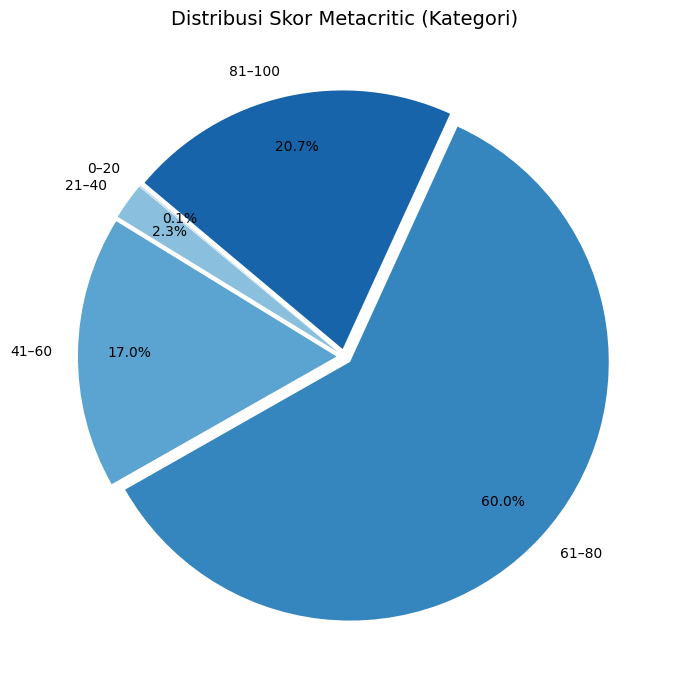

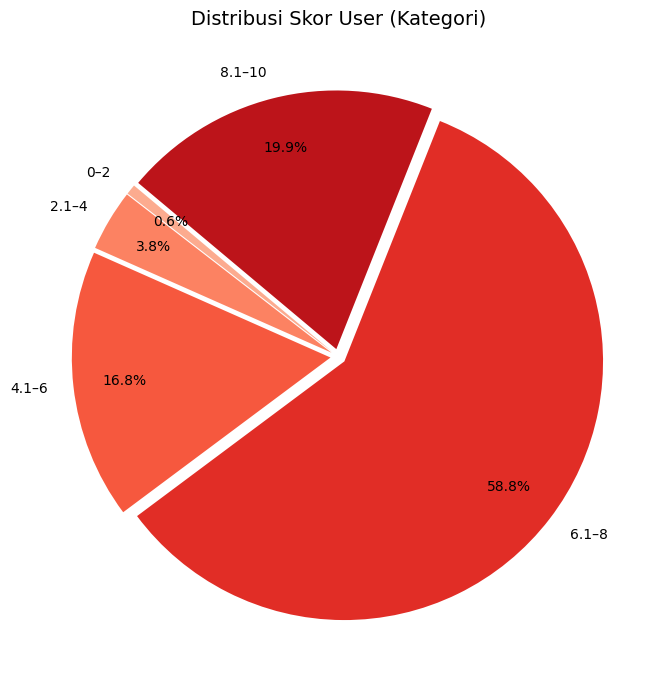

In [ ]:
# Buat kategori skor
metacritic_bins = pd.cut(df['metacritic_review_score'], bins=[0, 20, 40, 60, 80, 100], labels=["0–20", "21–40", "41–60", "61–80", "81–100"])
user_bins = pd.cut(df['user_review_score'], bins=[0, 2, 4, 6, 8, 10], labels=["0–2", "2.1–4", "4.1–6", "6.1–8", "8.1–10"])

# Hitung frekuensi
metacritic_counts = metacritic_bins.value_counts().sort_index()
user_counts = user_bins.value_counts().sort_index()

# Warna
blues = plt.cm.Blues(np.linspace(0.3, 0.8, len(metacritic_counts)))
reds = plt.cm.Reds(np.linspace(0.3, 0.8, len(user_counts)))

# Explode untuk efek renggang antar irisan
explode_m = [0.03] * len(metacritic_counts)
explode_u = [0.03] * len(user_counts)

# Pie Chart Metacritic
plt.figure(figsize=(7, 7))
plt.pie(metacritic_counts,
        labels=metacritic_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=blues,
        explode=explode_m,
        pctdistance=0.8,
        labeldistance=1.1)
plt.title("Distribusi Skor Metacritic (Kategori)", fontsize=14)
plt.tight_layout()
plt.show()

# Pie Chart User
plt.figure(figsize=(7, 7))
plt.pie(user_counts,
        labels=user_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=reds,
        explode=explode_u,
        pctdistance=0.8,
        labeldistance=1.1)
plt.title("Distribusi Skor User (Kategori)", fontsize=14)
plt.tight_layout()
plt.show()

**Mayoritas game memiliki skor Metacritic pada rentang 61–80 (60%) dan 81–100 (20.7%), yang menunjukkan bahwa sebagian besar game dalam dataset mendapatkan review yang positif hingga sangat baik. Sementara itu, hanya sebagian kecil game yang berada di kategori rendah (di bawah 60), mengindikasikan bahwa game dengan kualitas buruk relatif sedikit dalam dataset ini.**

## **b.Distribusi Genre**

<ipython-input-10-9a562f1558e1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah', y='Genre', data=top_genres, palette='viridis')


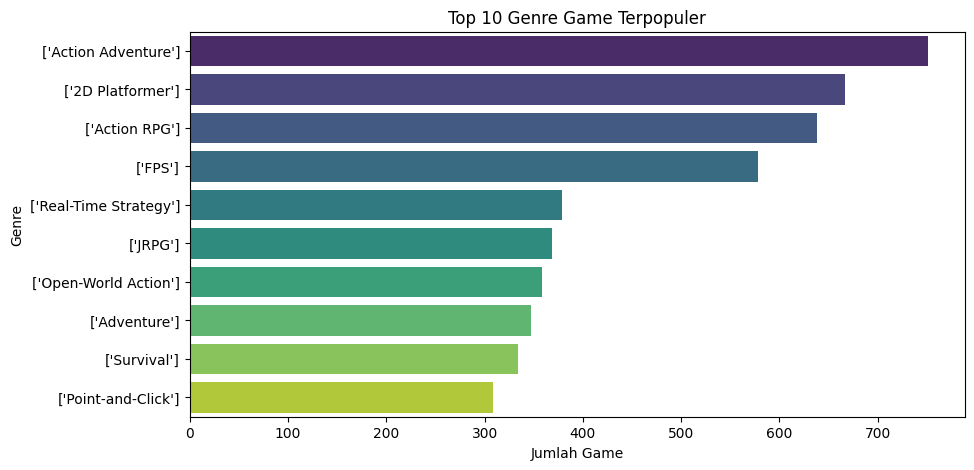

In [ ]:
# Pecah string genre jadi list
df['genres_split'] = df['genres'].str.split(',\s*')

# Hitung frekuensi semua genre
from collections import Counter
genre_counts = Counter(genre for sublist in df['genres_split'].dropna() for genre in sublist)

# Visualisasi top 10 genre
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Jumlah'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Jumlah', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genre Game Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Genre')
plt.show()

**Genre yang paling banyak muncul dalam dataset adalah Action Adventure, diikuti oleh 2D Platformer dan Action RPG. Ini menunjukkan bahwa genre aksi dan petualangan mendominasi pasar game, yang bisa jadi disebabkan oleh gameplay yang lebih seru dan jangkauan pemain yang lebih luas. Genre-genre ini cocok dijadikan fokus utama dalam sistem rekomendasi karena popularitasnya tinggi.**


## **c. Distribusi Platform**

<ipython-input-27-86d7130cab32>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Jumlah', y='Platform', data=top_platforms, palette='magma')


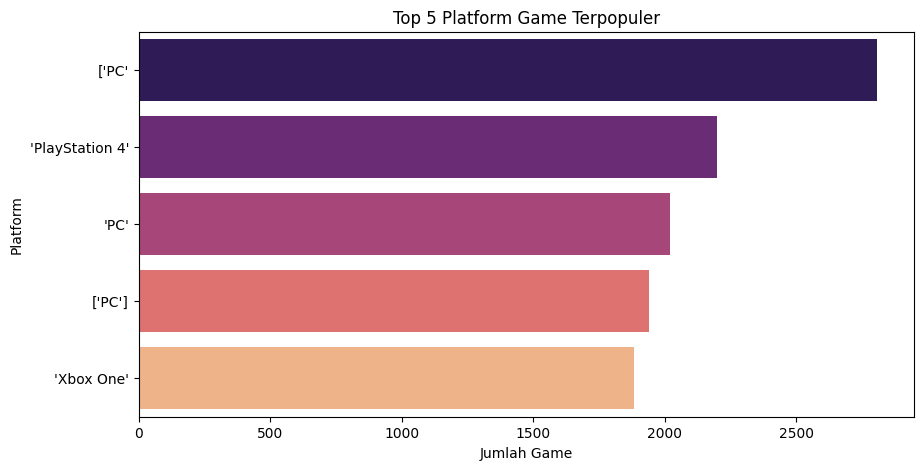

In [ ]:
# Pecah string platform jadi list
df['platforms_split'] = df['platforms'].str.split(',\s*')

# Hitung frekuensi semua platform
platform_counts = Counter(platform for sublist in df['platforms_split'].dropna() for platform in sublist)

# Visualisasi top 10 platform
top_platforms = pd.DataFrame(platform_counts.most_common(5), columns=['Platform', 'Jumlah'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Jumlah', y='Platform', data=top_platforms, palette='magma')
plt.title('Top 5 Platform Game Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Platform')
plt.show()

**Platform PC mendominasi sebagai platform dengan jumlah game terbanyak dalam dataset, meskipun muncul dalam beberapa variasi format penulisan (seperti 'PC', ['PC']). Ini menunjukkan bahwa PC merupakan platform utama bagi pengembang dan pemain game. Platform PlayStation 4 dan Xbox One juga masuk dalam lima besar, menandakan bahwa konsol tetap menjadi pasar penting dalam industri game.**

## **d. ESRB Rating**

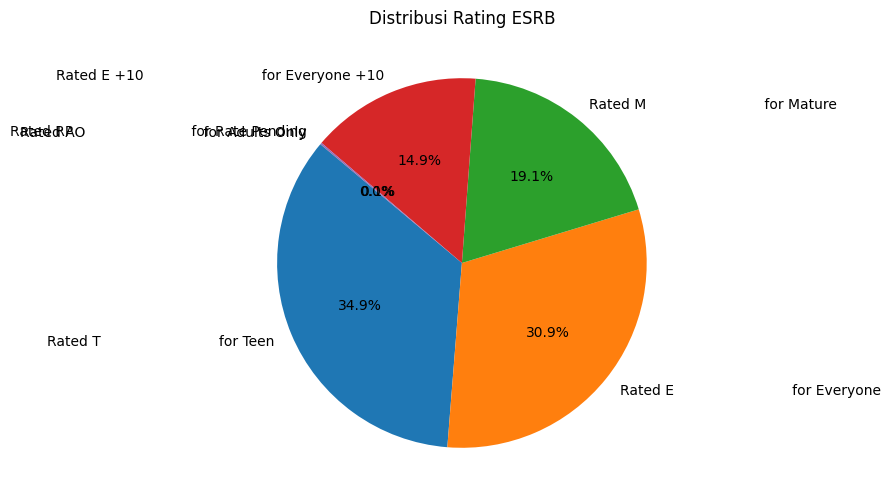

In [ ]:
esrb_counts = df['esrb'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(esrb_counts, labels=esrb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Rating ESRB")
plt.show()

- Persebaran rating dari game juga beragam, dan pada dataset ini gam untuk **Teen** lebih unggu dari yang lain. sehingga dapat dikategorikan kalau game-game pada dataset ramah Remaja. Disusul game Rated E yang beda 4% dari game for Teen
  

## **e. Developer**

<ipython-input-17-b0e4a2f686d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_devs.values, y=top_devs.index, palette='magma')


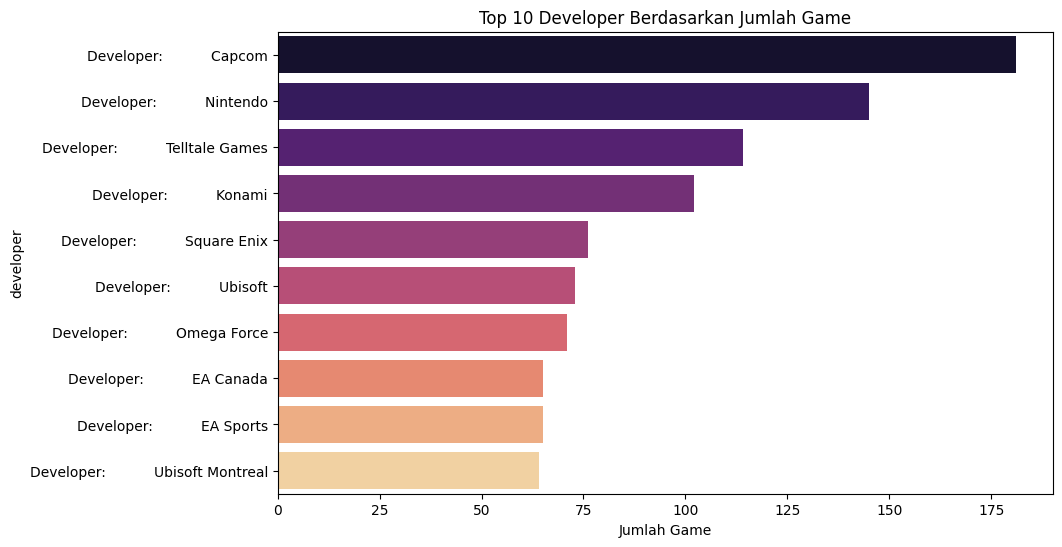

In [ ]:
top_devs = df.groupby('developer')['name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_devs.values, y=top_devs.index, palette='magma')
plt.title("Top 10 Developer Berdasarkan Jumlah Game")
plt.xlabel("Jumlah Game")
plt.ylabel("Developer")
plt.show()

- Developer dari game pada dataset di ungguli oleh Capcom dengan jumlah game lebih dari 175 judul dan disusul oleh Nintendo diposisi kedua

## **f. Must Play Games**

In [ ]:
must_play_count = df['must_play'].value_counts(normalize=True) * 100
print(must_play_count)

must_play
0    97.565347
1     2.434653
Name: proportion, dtype: float64


- Hanya sekitar 2,43% dari seluruh game dalam dataset yang masuk ke dalam kategori "Must Play", sementara sisanya sebesar 97,57% tidak termasuk dalam kategori tersebut. Ini menunjukkan bahwa hanya sebagian kecil game yang dianggap sangat direkomendasikan atau memiliki kualitas luar biasa menurut kriteria tertentu (misalnya, ulasan pengguna dan kritikus, popularitas, atau skor tinggi).

## **B. Multivariate EDA**

## a. Rata-rata Skor per Genre

<ipython-input-19-558e988c51b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_score.values[:10], y=genre_score.index[:10], palette='coolwarm')


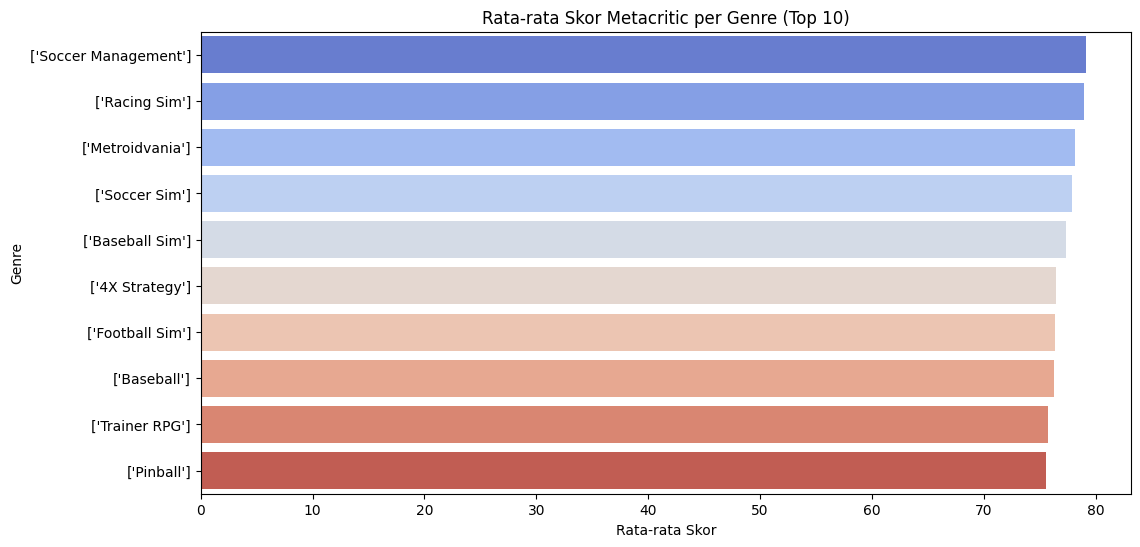

In [ ]:
# Pisah genre dulu
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split(', ')
df_exploded = df_exploded.explode('genres')

# Rata-rata skor per genre
genre_score = df_exploded.groupby('genres')['metacritic_review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_score.values[:10], y=genre_score.index[:10], palette='coolwarm')
plt.title("Rata-rata Skor Metacritic per Genre (Top 10)")
plt.xlabel("Rata-rata Skor")
plt.ylabel("Genre")
plt.show()

- Dari persebaran data, diambil Top 10 game dengan score terbaik dan itu diungguli oleh Soccer Management dan diposisi kedua adalah Racing Sim. Dapa diambil kesimpulan kalau para pemain game lebih menyukai game bertema sport seperti yang tertera pada posisi pertama dan kedua

## **b. Platform vs Must Play**

<ipython-input-20-a64223719e96>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=must_play_by_platform.values, y=must_play_by_platform.index, palette='Set2')


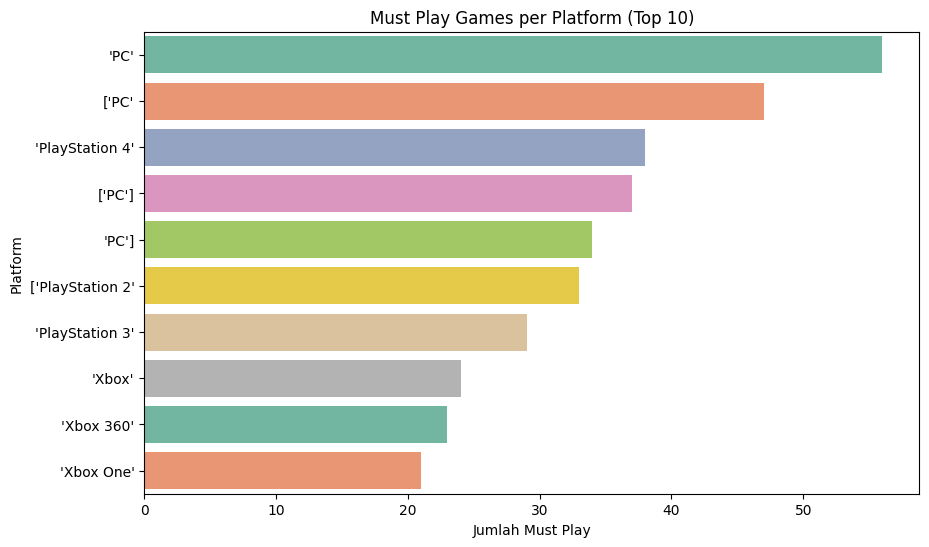

In [ ]:
df_platform = df.copy()
df_platform['platforms'] = df_platform['platforms'].str.split(', ')
df_platform = df_platform.explode('platforms')

must_play_by_platform = df_platform[df_platform['must_play'] == 1]['platforms'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=must_play_by_platform.values, y=must_play_by_platform.index, palette='Set2')
plt.title("Must Play Games per Platform (Top 10)")
plt.xlabel("Jumlah Must Play")
plt.ylabel("Platform")
plt.show()

- Dari data dapat dilihat Top 10 platform yang sering digunakan oleh player ketika berbaik game, dan itu diungguli oleh platform PC. Bisa diambil asumsi bahwa PC memiliki banyak game yang mudah untuk diakses oleh player.

## **c.  Skor Metacritic vs User vs Must Play**

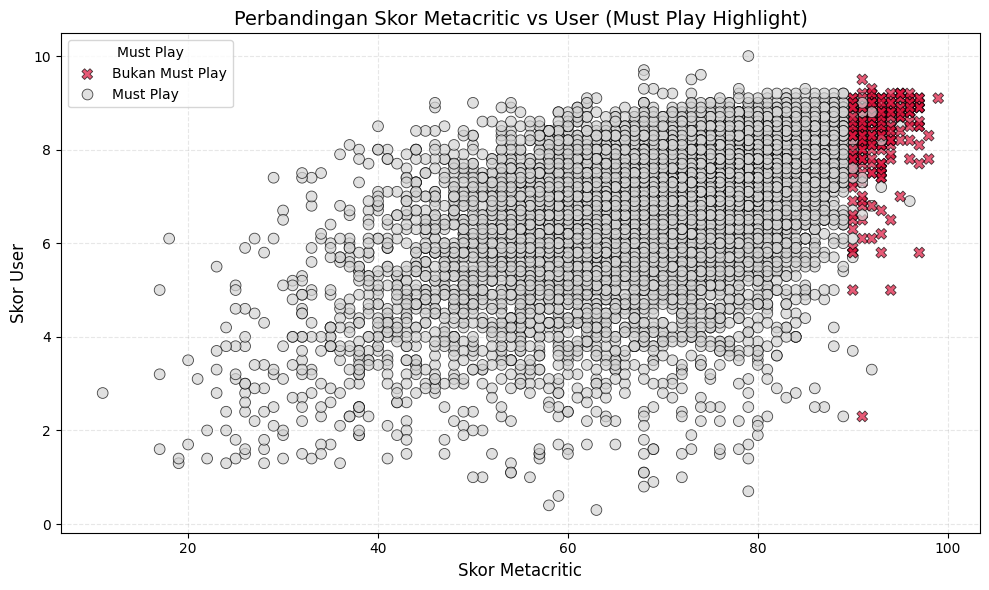

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='metacritic_review_score',
    y='user_review_score',
    hue='must_play',
    style='must_play',
    palette={0: 'lightgray', 1: 'crimson'},
    s=60,
    edgecolor='black',
    alpha=0.7
)

plt.title("Perbandingan Skor Metacritic vs User (Must Play Highlight)", fontsize=14)
plt.xlabel("Skor Metacritic", fontsize=12)
plt.ylabel("Skor User", fontsize=12)
plt.legend(title="Must Play", labels=["Bukan Must Play", "Must Play"])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

- Game yang berlabel "Must Play" (warna merah) umumnya memiliki skor Metacritic tinggi (90–100) dan skor user juga tinggi (di atas 7).

- Sebagian besar game lainnya tersebar luas, tetapi tidak semua skor Metacritic tinggi disukai user, terlihat dari beberapa game dengan skor user rendah meski Metacritic-nya tinggi.

- Label "Must Play" sangat jarang ditemukan pada skor Metacritic <90.

## d. ESRB vs Genre

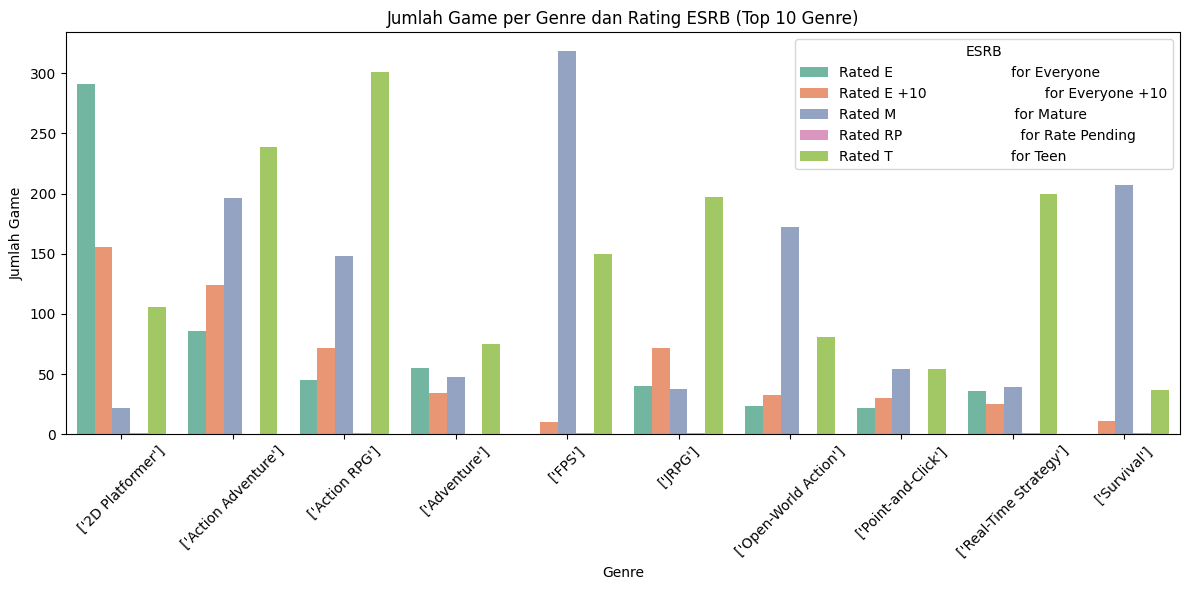

In [ ]:
# Ambil top 10 genre paling umum
top_genres = df_exploded['genres'].value_counts().head(10).index
df_top = df_exploded[df_exploded['genres'].isin(top_genres)]

# Hitung jumlah game per kombinasi esrb & genre
grouped = df_top.groupby(['genres', 'esrb']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='genres', y='count', hue='esrb', palette='Set2')
plt.title("Jumlah Game per Genre dan Rating ESRB (Top 10 Genre)")
plt.xlabel("Genre")
plt.ylabel("Jumlah Game")
plt.xticks(rotation=45)
plt.legend(title='ESRB')
plt.tight_layout()
plt.show()

- Genre dengan Jumlah Game Terbanyak:Genre 'Action RPG' dan '2D Platformer' memiliki jumlah game tertinggi secara keseluruhan.
- 'FPS' (First Person Shooter) didominasi oleh rating Mature, menandakan bahwa genre ini lebih banyak ditujukan untuk pemain dewasa.
- Distribusi Rating ESRB: Rated E (Everyone) banyak terdapat pada genre '2D Platformer', menunjukkan bahwa genre ini ramah untuk segala usia. Rated T (Teen) mendominasi banyak genre seperti 'Action RPG', 'Action Adventure', dan 'JRPG'. Rated M (Mature) sangat dominan di genre seperti 'FPS', 'Open-World Action', dan 'Survival', menunjukkan bahwa game dengan konten lebih dewasa populer di genre-genre ini.
- Genre yang Merata di Semua Rating: Genre seperti 'Adventure' dan 'Point-and-Click' menunjukkan distribusi rating yang relatif merata, menandakan fleksibilitas genre tersebut untuk berbagai usia.

# **Tahapan Persiapan Data untuk Pemodelan (Content-Based Filtering)**

## **a.  Encoding Teks**

In [ ]:
# Gabungkan genre dan platform jadi satu teks
df['combined_features'] = df['genres'] + ' ' + df['platforms']

vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(df['combined_features'])

# Membangun Sistem Rekomendasi Berbasis Konten (Content-Based Filtering)

## a.  Gabungkan Fitur Teks
genres + platforms

In [ ]:
df['combined_features'] = df['genres'] + ' ' + df['platforms']

Membuat fitur baru combined_features dengan menggabungkan genres dan platforms menggunakan spasi (' ').

*Tujuannya:*
- Membuat representasi tekstual yang lebih kaya untuk model Content-Based Filtering.

## b. Inisialisasi TF-IDF

Inisialisasi TfidfVectorizer dengan stop_words='english' untuk menghapus kata-kata umum yang tidak bermakna penting.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

## c.  Fit dan Transform Data

In [ ]:
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [ ]:
print(tfidf.get_feature_names_out())

['2d' '360' '3d' '3ds' '4x' '64' 'action' 'advance' 'adventure' 'aircraft'
 'application' 'arcade' 'artillery' 'athletics' 'auto' 'baseball' 'based'
 'basketball' 'battle' 'beat' 'biking' 'billiards' 'board' 'bowling' 'boy'
 'card' 'career' 'click' 'combat' 'command' 'compilation' 'cricket'
 'dancing' 'defense' 'dreamcast' 'ds' 'edutainment' 'em' 'exercise'
 'fighting' 'fishing' 'football' 'fps' 'future' 'gambling' 'game'
 'gamecube' 'golf' 'gun' 'hidden' 'hockey' 'horizontal' 'horse' 'hunting'
 'individual' 'ios' 'ipad' 'iphone' 'jrpg' 'life' 'light' 'linear' 'logic'
 'management' 'marine' 'matching' 'meta' 'metroidvania' 'miscellaneous'
 'mmorpg' 'moba' 'nintendo' 'novel' 'object' 'open' 'party' 'pc' 'person'
 'pet' 'pinball' 'platformer' 'playstation' 'point' 'psp' 'puzzle' 'quest'
 'racing' 'rail' 'real' 'rhythm' 'roguelike' 'rpg' 'rts' 'rugby' 'sandbox'
 'series' 'shoot' 'shooter' 'sim' 'simulation' 'skating' 'skiing' 'soccer'
 'space' 'sport' 'sports' 'stacking' 'strategy' 'surfi

**Hasilnya:**
- Membentuk matriks TF-IDF yang merepresentasikan kemiripan konten antar game berdasarkan teks.

 ## Pembuatan Fungsi Berdasarkan Nama Game
 - Fungsi Content-Based Filtering berdasarkan judul game, dan yang dikembalikan adalah daftar game yang mirip

In [ ]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [ ]:
def recommend_games(title, cosine_sim=cosine_sim, df=df, top_n=5):
    """
    Memberikan rekomendasi game mirip berdasarkan judul.

    Args:
        title (str): Judul game yang ingin dicari kemiripannya
        cosine_sim (array): Matriks cosine similarity antar game
        df (DataFrame): DataFrame asli
        top_n (int): Jumlah rekomendasi yang ingin ditampilkan

    Returns:
        DataFrame: Daftar game mirip
    """
    # Cek apakah judul ada di dataset
    if title not in indices:
        return f"Game '{title}' tidak ditemukan di data."

    # Ambil index dari game
    idx = indices[title]

    # Ambil skor kemiripan game tsb ke semua game lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan dari skor tertinggi ke terendah (kecuali diri sendiri)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]

    # Ambil index game rekomendasi
    game_indices = [i[0] for i in sim_scores]

    # Return dataframe hasil
    return df[['name', 'genres', 'platforms']].iloc[game_indices].reset_index(drop=True)


In [ ]:
recommend_games("Yaris", top_n=5)

,name,genres,platforms
0,Ridge Racer 6,['Auto Racing'],['Xbox 360']
1,Motocross Madness (2013),['Auto Racing'],['Xbox 360']
2,Joy Ride Turbo,['Auto Racing'],['Xbox 360']
3,Kinect Joy Ride,['Auto Racing'],['Xbox 360']
4,Things on Wheels,['Auto Racing'],['Xbox 360']


## Fungsi Top-N Game Mirip

Fungsi top_n_recommendations bertujuan untuk mengidentifikasi dan mengembalikan DataFrame yang berisi top_n game teratas yang menunjukkan skor kemiripan rata-rata tertinggi jika dibandingkan dengan game lain dalam dataset. Fungsi ini mencapai tujuannya dengan terlebih dahulu menghitung rata-rata cosine similarity untuk setiap game terhadap semua game lain menggunakan np.mean(cosine_sim, axis=1). Kemudian, ia membuat DataFrame baru result_df dengan nama game, genre, platform, dan rata-rata kemiripan yang dihitung. Terakhir, ia mengurutkan DataFrame ini dalam urutan menurun berdasarkan rata-rata kemiripan dan mengembalikan top_n entri teratas, memberikan wawasan tentang game yang memiliki fitur paling umum dan dengan demikian dianggap sangat mirip dengan yang lain dalam dataset.

In [ ]:
def top_n_recommendations(cosine_sim, df, top_n=10):

    # Hitung rata-rata similarity tiap game ke semua game lain
    avg_sim = np.mean(cosine_sim, axis=1)

    # Buat DataFrame hasil
    result_df = df[['name', 'genres', 'platforms']].copy()
    result_df['avg_similarity'] = avg_sim

    # Urutkan dari yang paling mirip dengan banyak game lain
    result_df = result_df.sort_values(by='avg_similarity', ascending=False)

    return result_df.head(top_n).reset_index(drop=True)

# Matrik  Evaluasi

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.64593282, ..., 0.07735281, 0.        ,
        0.        ],
       [0.        , 1.        , 0.13718595, ..., 0.        , 0.16935116,
        0.        ],
       [0.64593282, 0.13718595, 1.        , ..., 0.        , 0.21784612,
        0.        ],
       ...,
       [0.07735281, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16935116, 0.21784612, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

- Diagonal Nilai = 1.0 → Self-Similarity

Baris dan kolom diagonal memiliki nilai 1.0, artinya setiap game pasti 100% mirip dengan dirinya sendiri — ini adalah karakteristik alami dari cosine similarity.

- Sebagian Besar Nilai = 0 → Banyak Game Tidak Mirip

Banyak nilai cosine yang 0.0, menandakan banyak pasangan game yang tidak memiliki kesamaan konten berdasarkan fitur yang digunakan (genre, platform, review score).
Ini juga bisa menunjukkan bahwa fitur sangat sparse atau tidak terlalu banyak overlap antar game.

- Ada Game yang Sangat Mirip (0.6+):
Misalnya, nilai 0.6459 antara game ke-0 dan ke-2 menunjukkan adanya kemiripan yang signifikan berdasarkan konten (bisa jadi genre dan platform-nya sama, serta skor review-nya mirip).
Ini penting dalam sistem rekomendasi karena game-game inilah yang akan muncul sebagai hasil rekomendasi utama.

- Distribusi Miripnya Game Tidak Merata:

Terlihat ada game yang punya banyak kemiripan (beberapa nilai > 0), dan ada juga yang hampir tidak mirip dengan game lainnya sama sekali (baris penuh 0 kecuali diagonal).

Ini bisa mengindikasikan bahwa beberapa game sangat unik, atau fitur mereka tidak terekstrak dengan baik (misalnya, genre yang sangat niche).

- Perlu Threshold untuk Rekomendasi:

Karena banyak nilai similarity mendekati 0, penting untuk menetapkan threshold minimal (misalnya 0.2 atau 0.3) agar rekomendasi yang diberikan benar-benar relevan dan tidak asal mirip.

In [ ]:
top_n_recommendations(cosine_sim, df, top_n=10)

,name,genres,platforms,avg_similarity
0,Onimusha: Warlords,['Action Adventure'],"['PlayStation', 'PlayStation 2', 'PC', 'PlaySt...",0.253513
1,Arietta of Spirits,['Action Adventure'],"['PC', 'PlayStation 4', 'Nintendo Switch', 'Xb...",0.250333
2,Ice Age: Scrat's Nutty Adventure,['Action Adventure'],"['Xbox One', 'PlayStation 4', 'PC', 'Nintendo ...",0.250333
3,Furi,['Action Adventure'],"['PlayStation 4', 'PC', 'Xbox One', 'Nintendo ...",0.250333
4,Okami HD,['Action Adventure'],"['PlayStation 3', 'Xbox One', 'PlayStation 4',...",0.250333
5,The Lord of the Rings - Gollum,['Action Adventure'],"['PC', 'PlayStation 4', 'Xbox One', 'PlayStati...",0.248740
6,Life is Strange: True Colors,['Action Adventure'],"['PC', 'Xbox Series X', 'PlayStation 5', 'Xbox...",0.248740
7,UFO Robot Grendizer: The Feast of the Wolves,['Action Adventure'],"['PlayStation 5', 'Nintendo Switch', 'PlayStat...",0.248740
8,Shadows of the Damned: Hella Remastered,['Action Adventure'],"['Nintendo Switch', 'PC', 'PlayStation 4', 'Xb...",0.248740
9,Strayed Lights,['Action Adventure'],"['PlayStation 5', 'PC', 'Xbox One', 'PlayStati...",0.248740


### 📊 Insight dari Top-N Rekomendasi

Berikut adalah beberapa insight yang diperoleh dari hasil Top-10 rekomendasi yang dihasilkan oleh sistem:

## 1. Genre Konsisten
- Semua game yang direkomendasikan memiliki genre utama **Action Adventure**.
- Hal ini menunjukkan bahwa sistem mampu memahami dan memprioritaskan genre sebagai salah satu faktor utama dalam rekomendasi.

## 2. Platform yang Relevan
- Game yang direkomendasikan sebagian besar tersedia di platform populer seperti **PlayStation 4**, **PC**, **Xbox One**, dan **Nintendo Switch**.
- Ini memastikan bahwa pengguna mendapatkan rekomendasi game yang kompatibel dengan perangkat yang mereka gunakan.

## 3. Nilai Similarity yang Tinggi
- Rata-rata nilai similarity berkisar antara **0.248** hingga **0.253**, yang termasuk tinggi dalam skala cosine similarity.
- Menunjukkan bahwa rekomendasi yang dihasilkan sangat relevan berdasarkan kombinasi fitur teks.

## 4. Variasi dalam Kesamaan
- Walaupun semua game berada dalam genre yang sama, judul-judul yang direkomendasikan tetap menawarkan variasi dari segi cerita, tema, dan gameplay.
- Ini memberikan pengguna lebih banyak pilihan tanpa mengorbankan relevansi.

## 5. Potensi Pengembangan Sistem
- Sistem saat ini hanya mengandalkan `genres` dan `platforms`.
- Untuk meningkatkan akurasi di masa depan, fitur tambahan seperti **developer**, **mode permainan** (singleplayer/multiplayer), atau **rating pengguna** dapat dipertimbangkan.
